#★ UBER Fare Prediction ★#

#Problem Statement:

Uber serves many customers daily and needs to manage their data well to come up with new ideas and improve results. Accurately predicting fare prices for future trips is crucial for providing transparent and fair pricing to customers.

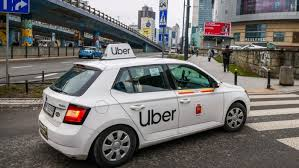

#Step-1: Importing the data
Importing the necessary libriraries to read the data

In [473]:
#used for numerical computing
import numpy as np
#used for data manipulation
import pandas as pd
#used for data visualization
import seaborn as sns,matplotlib.pyplot as plt
#used to ignore all warning messages
import warnings
warnings.filterwarnings('ignore')

In [474]:
#Load dataset
data = pd.read_csv('/content/drive/MyDrive/Uber/uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [475]:
#check shape of dataset
data.shape

(200000, 9)

In [476]:
#check columns of dataset
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [477]:
#check size of dataset
data.size

1800000

#Step-2:Inspecting the Data

In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [479]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [480]:
#check null values
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [481]:
#replace null with mean or median
data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean(),inplace=True)
data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean(),inplace=True)

#Step-3: Data Handing and Preprocessing

In [482]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  200000 non-null  float64
 7   dropoff_latitude   200000 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [483]:
#convert object into datetime (pickup_datetime)
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

##Step-4: EDA Analysis of the Dataset

<Axes: xlabel='fare_amount', ylabel='Density'>

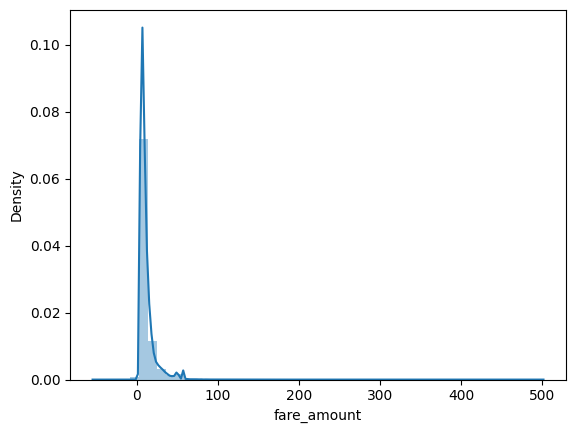

In [484]:
#distribution of fare amounts
sns.distplot(data['fare_amount'])

<Axes: xlabel='pickup_latitude', ylabel='Density'>

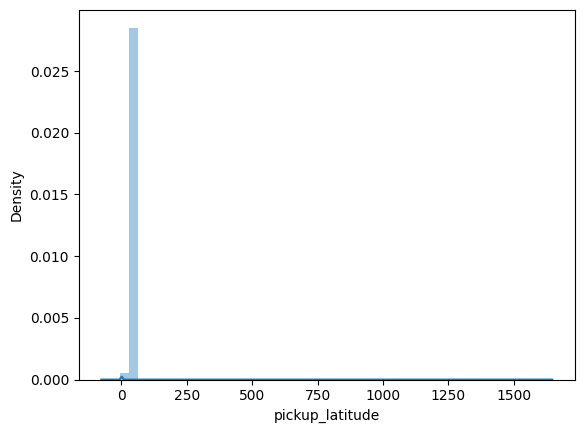

In [485]:
#distribution of pickup_latitude
sns.distplot(data['pickup_latitude'])


<Axes: xlabel='pickup_longitude', ylabel='Density'>

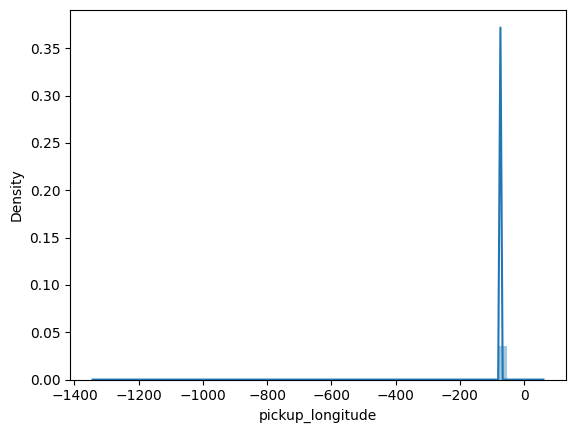

In [486]:
#distribution of pickup_longitude
sns.distplot(data['pickup_longitude'])

In [487]:
#display records where fare amount is greater than zero
data=data[data['fare_amount']>0]

In [488]:
#display records where fare amount is less than zero
data[data['fare_amount']<0]


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [489]:
#Calculate the first quartile (Q1) for the 'fare_amount' column
#calculate value below which 25% of the data falls
q1= data['fare_amount'].quantile(0.25)
q1

6.0

In [490]:
# Calculate the third quartile (Q3) for the 'fare_amount' column
#calculate value below which 75% of the data falls
q3 =data['fare_amount'].quantile(0.75)
q3

12.5

# Step-5: Feature Engineering#

In [491]:
data=data.assign(hour= data['pickup_datetime'].dt.hour,
                 day= data['pickup_datetime'].dt.day,
                 month= data['pickup_datetime'].dt.month,
                 year= data['pickup_datetime'].dt.year,
                 weekday= data['pickup_datetime'].dt.weekday)
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [492]:
#Calculate the Interquartile Range (IQR) for the 'fare_amount' column
IQR = q3-q1
IQR


6.5

In [493]:
#Calculate the lower bound for outliers using the IQR method
#The lower bound is computed as Q1 minus 1.5 times the Interquartile Range (IQR)
lower_bound = q1-1.5*q3
lower_bound

-12.75

In [494]:
#Calculate the upper bound for outliers using the IQR method
#The upper bound is computed as Q3 plus 1.5 times the Interquartile Range (IQR)
upper_bound =q1+1.5*q3
upper_bound

24.75

In [495]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km
data['Distance_km'] = haversine_distance(data['pickup_latitude'],data['pickup_longitude'],
                                      data['dropoff_latitude'],data['dropoff_longitude'])
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,Distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [496]:
#drop unnessary column
data.drop(['pickup_datetime','Unnamed: 0','key'],axis=1,inplace=True)
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,Distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


<class 'numpy.ndarray'>
(199978, 12)


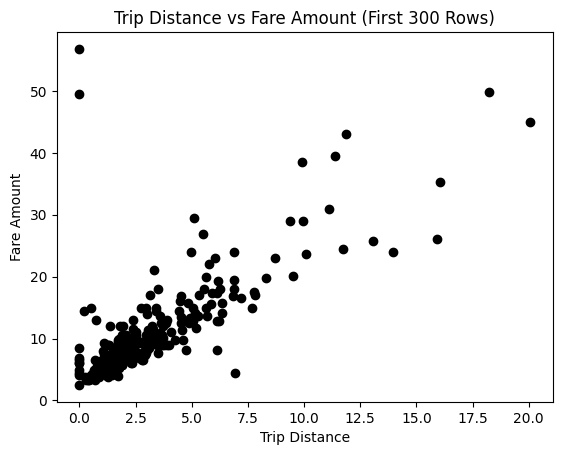

In [497]:
#observe in visualization Distance increase Fare Amount also increase
df=np.array(data)
print(type(df))
print(df.shape)
plt.plot(df[0:300,11:12],df[0:300,0:1],'o',color='black')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs Fare Amount (First 300 Rows)')
plt.show()

#Step-6 :Data Scaling/Normalization#

In [498]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Step-7: Spliting the Data into train and Test set

In [499]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,Distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [500]:
X=df
X
y=data['fare_amount']
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199978, dtype: float64

#Step-8: Correlation Analysis

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Step-9: Prediction on Test Set

In [514]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X,y)

LinearRegression()

In [515]:
lr_model.coef_

array([ 1.00000000e+00, -5.74452442e-17,  3.47748156e-17, -6.62028141e-17,
        3.11717178e-17, -1.70690969e-17,  1.06137009e-17, -8.16251762e-18,
       -9.37408839e-18, -2.36634905e-17, -4.32417015e-18, -1.45861674e-16])

In [516]:
lr_model.intercept_

3.907985046680551e-14

In [521]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)


In [502]:
len(X_train)

139984

In [503]:
len(y_train)

139984

In [504]:
len(X_test)

59994

In [505]:
len(y_test)

59994

In [518]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [519]:
lr_model.coef_

array([ 1.00000000e+00,  8.81166906e-17, -5.82230244e-17,  1.18485525e-16,
       -5.60940872e-17, -4.14952063e-18,  8.74233818e-17,  7.36052450e-18,
       -3.85183184e-17, -1.13651292e-16, -1.23863874e-17, -1.10516904e-16])

In [520]:
lr_model.intercept_

-1.7408297026122455e-13

fare_price=coef*distance_km+intercept

In [523]:
y_pred=lr_model.predict(X_test)
y_pred

array([13.7, 12.5,  5. , ...,  5.5,  4.9, 11.5])

In [524]:
y_test

1743      13.70
178736    12.50
79355      5.00
3649       8.10
169676    57.33
          ...  
119077    11.30
123378    22.50
142696     5.50
94182      4.90
117077    11.50
Name: fare_amount, Length: 59994, dtype: float64

In [525]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

#summary:

R-squared value of 1.0 model predicts Uber fares perfectly.
